<a href="https://colab.research.google.com/github/MarioViniciusBC/Projeto-de-Aprendizado-de-Maquina-de-Ponta-a-Ponta/blob/main/Projeto_de_Aprendizado_de_M%C3%A1quina_de_Ponta_a_Ponta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Aprendizado de Máquina de Ponta a Ponta

In [2]:
import pandas as pd

housing = pd.read_csv('/content/housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Projeto: Preços do Setor Imobiliário na Califórnia

> "Neste capítulo, escolhemos o conjunto de dados do repositório StatLib referente a preços do setor imobiliário na Califórnia."

#### Sobre o Conjunto de Dados
* **Origem:** Repositório StatLib.
* **Base de dados:** Construída a partir do censo de 1990 na Califórnia.
* **Contexto Histórico:** Não são dados recentes.

#### Adaptações para o Aprendizado
Apesar de serem dados antigos, eles possuem excelentes qualidades para o ensino de *Machine Learning*. Por isso, assumimos a premissa de tratá-los como recentes. Para fins didáticos, o autor realizou as seguintes modificações no *dataset* original:
1. **Inclusão:** Adição de um atributo categórico extra.
2. **Remoção:** Exclusão de algumas características (*features*) menos relevantes.

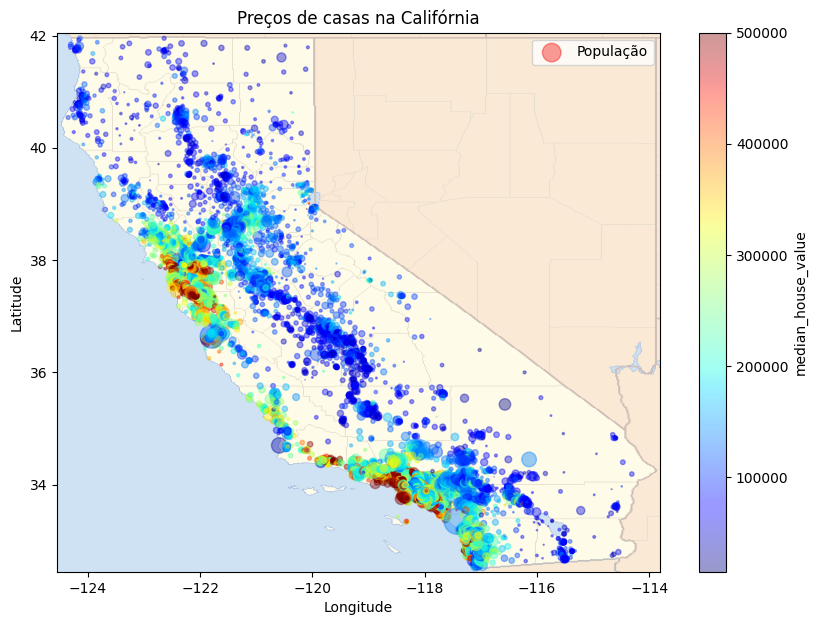

In [3]:
import urllib.request
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# 1. Baixar a imagem do mapa da Califórnia do repositório do livro
url_mapa = "https://raw.githubusercontent.com/ageron/handson-ml3/main/images/end_to_end_project/california.png"
urllib.request.urlretrieve(url_mapa, "california.png")

# 2. Carregar a imagem baixada
california_img = mpimg.imread("california.png")

# 3. Criar o gráfico de dispersão (seus dados)
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="População",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=True, alpha=0.4)

# 4. Sobrepor a imagem do mapa ao fundo
# O parâmetro 'extent' alinha a imagem perfeitamente com as coordenadas geográficas [x_min, x_max, y_min, y_max]
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# 5. Ajustes finais de exibição
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Preços de casas na Califórnia")
plt.legend()
plt.show()

#### Análise Visual: Preços do Setor Imobiliário na Califórnia

Este gráfico de dispersão geográfico fornece uma excelente intuição visual sobre como as diferentes características dos dados se relacionam com o valor final dos imóveis.

#### Como interpretar o gráfico
* **Eixos (X e Y):** A Longitude e a Latitude desenham o mapa do estado da Califórnia. Cada círculo no gráfico representa um distrito.
* **Tamanho dos círculos:** Representa a **população** daquele distrito. Círculos maiores indicam áreas mais densamente povoadas.
* **Cores (Mapa de Calor):** Representa o **valor médio da casa** (`median_house_value`). Pontos azuis indicam valores mais baixos, enquanto pontos amarelos, laranjas e vermelhos indicam os valores mais altos (chegando ao teto de $500.000).

#### Principais Insights
1. **A regra de ouro do mercado imobiliário ("Localização"):** Fica visualmente claro que os preços das casas estão fortemente ligados à localização. As áreas em vermelho e laranja (casas mais caras) estão estritamente concentradas na faixa litorânea.
2. **Grandes Polos:** É possível identificar rapidamente dois grandes aglomerados de preços altíssimos e grande densidade populacional:
    * A área da Baía de São Francisco (mais ao norte, ao redor da latitude 38).
    * A região metropolitana de Los Angeles e San Diego (mais ao sul, ao redor da latitude 34).
3. **Interior vs. Litoral:** À medida que nos afastamos do oceano Pacífico (movendo para o interior do estado no gráfico), a coloração passa a ser predominantemente azul, indicando imóveis significativamente mais baratos, independentemente do tamanho da população local.

**Conclusão da Etapa:** Uma rápida análise visual nos indica que a **proximidade com o oceano** e a **densidade populacional** serão *features* (variáveis) com grande peso quando formos treinar nosso modelo de Machine Learning.

#### O Segredo dos Dados: O "Grupo de Bairros" (A parte técnica)

O governo americano (*US Census Bureau*) não divulga dados de casas individuais (por questões de privacidade e volume de dados). Em vez disso, eles pegam um aglomerado de quarteirões onde vivem cerca de 600 a 3.000 pessoas e tiram a média de tudo ali dentro. Eles chamam esse pedaço de terra de block group (grupo de bairros) que chamaremos de "bairro" (ou *district*, no original em inglês).

Isso significa que cada linha da tabela do Pandas não representa uma casa, mas sim um bairro inteiro! É por isso que as colunas da tabela trazem médias e totais daquela região, por exemplo:

* **median_income**: A renda média das pessoas daquele bairro.

* **housing_median_age**: A idade média das casas daquele bairro.

* **total_rooms**: A soma de todos os quartos de todas as casas daquele bairro.

### 🎯 Etapa 1: Enquadramento do Problema

Antes de escrever qualquer código ou treinar modelos, é crucial entender o contexto de negócio e a arquitetura do sistema que vamos construir.

#### 💼 O Objetivo de Negócio
* **O Propósito do Modelo:** A previsão do preço médio dos imóveis não é o produto final. Ela será enviada para um **sistema *downstream*** (um outro sistema na esteira de produção) que decidirá se vale a pena ou não investir em determinadas regiões. A precisão do modelo afeta diretamente a receita da empresa.
* **O Problema Atual:** Hoje, as estimativas são feitas manualmente por especialistas. É um processo caro, demorado e impreciso (os erros frequentemente ultrapassam 10% do valor real). A meta é automatizar e baratear esse processo utilizando dados do censo.

#### 🤖 Arquitetura do Sistema de Machine Learning
Com o cenário mapeado, podemos definir que nosso projeto possui as seguintes características técnicas:
* **Aprendizado Supervisionado:** Os dados históricos de treinamento já possuem o resultado esperado (estão "rotulados" com os preços médios reais dos bairros).
* **Regressão Multivariada:** Nosso objetivo é prever um valor numérico contínuo (o preço da casa) baseando-se em múltiplas variáveis de entrada simultaneamente (como população, renda média, etc.).
* **Aprendizado em Lote (*Batch Learning*):** O conjunto de dados é estático e pequeno o suficiente para caber na memória. Como não há um fluxo de dados em tempo real exigindo que o modelo se adapte a cada segundo, o treinamento tradicional em lote é a abordagem ideal.

# Etapa 2: Seleção da Medida de Desempenho

Após enquadrar o problema como uma tarefa de regressão, precisamos escolher uma métrica para avaliar o quão bem o nosso modelo de *Machine Learning* está realizando as previsões. Essa métrica de erro é chamada de **Medida de Desempenho** ou **Função de Custo**.

## 1. Raiz do Erro Quadrático Médio (RMSE)
A medida típica de desempenho para problemas de regressão é a **RMSE** (*Root Mean Square Error*). Ela penaliza grandemente os erros maiores, o que a torna excelente para medir a quantidade geral de erro que o sistema comete nas previsões.

A fórmula matemática da RMSE é dada pela equação:

$$RMSE(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2}$$

### Entendendo a Notação Matemática:
* $m$: É o número total de instâncias (bairros) no conjunto de dados.
* $\mathbf{x}^{(i)}$: É um vetor contendo todas as características (longitude, latitude, renda, etc.) da *i-ésima* instância, excluindo o valor final que queremos prever.
* $y^{(i)}$: É o *rótulo* (label), ou seja, o **valor real desejado** (o preço verdadeiro da casa) para aquela instância.
* $\mathbf{X}$: É a matriz completa contendo todas as características de todas as instâncias do *dataset*.
* $h$: É a função de previsão do sistema (a *hipótese*). Ela recebe $\mathbf{x}^{(i)}$ e gera o valor previsto $\hat{y}^{(i)}$.

Ao conectar a teoria matemática com a prática no código, é fundamental entender como a Álgebra Linear representa as linhas e colunas da nossa tabela de dados (nosso DataFrame do Pandas).

#### O Vetor de Coluna: $\mathbf{x}^{(i)}$
Por convenção matemática, o vetor que carrega as características (*features*) de uma única instância — como as informações de um único bairro — é escrito "em pé". Ele é chamado de **vetor coluna**.

Matematicamente, a $i$-ésima instância se parece com isto:

$$\mathbf{x}^{(i)} = \begin{pmatrix} \text{longitude} \\ \text{latitude} \\ \text{quartos} \\ \vdots \end{pmatrix}$$

##### A Transposição: $(\mathbf{x}^{(i)})^T$
No nosso DataFrame do Pandas, cada bairro ocupa uma **linha** horizontal, e não uma coluna vertical. Para que a matemática se alinhe com a nossa tabela real, aplicamos uma operação chamada **transposição**, representada pela letra $T$.

A expressão $(\mathbf{x}^{(i)})^T$ pega o vetor que estava "em pé" e o "deita", transformando-o em um **vetor linha**:

$$(\mathbf{x}^{(i)})^T = \begin{pmatrix} \text{longitude} & \text{latitude} & \text{quartos} & \dots \end{pmatrix}$$

##### A Matriz de Características: $\mathbf{X}$
Para formar a matriz $\mathbf{X}$ que representa todo o nosso *dataset* (excluindo os rótulos de preço), o autor simplesmente empilha todos esses vetores de linha recém-deitados uns sobre os outros. O resultado é a exata estrutura da tabela que vemos no código:

$$\mathbf{X} = \begin{pmatrix} (\mathbf{x}^{(1)})^T \\ (\mathbf{x}^{(2)})^T \\ \vdots \\ (\mathbf{x}^{(m)})^T \end{pmatrix}$$

#### Entendendo o RMSE na Prática

O **RMSE** (*Root Mean Square Error* ou Raiz do Erro Quadrático Médio) é simplesmente uma forma de responder à pergunta: *"Em média, por quantos dólares o nosso modelo está errando o preço das casas?"*

O cálculo funciona na seguinte ordem:

1. **O Erro:** Primeiro, o sistema calcula a diferença entre o preço que ele previu e o preço real da casa.
2. **O Quadrado:** Para tirar os sinais negativos e evitar que um erro anule o outro, elevamos todos os erros ao quadrado. O grande "pulo do gato" de elevar ao quadrado é que isso pune erros grandes de forma muito mais severa.
3. **A Média:** Agora, somamos essas punições todas e dividimos pelo total de casas para descobrir qual é a "média da punição" que o modelo está sofrendo.
4. **A Raiz:** Por fim, aplicamos a raiz quadrada no valor final apenas para "desfazer" a bizarrice da unidade (trazendo o valor de volta para a unidade original de dinheiro).


## 2. Erro Médio Absoluto (MAE)
Embora a RMSE seja o padrão, ela é muito sensível a *outliers* (valores atípicos e extremos). Se o nosso conjunto de dados de bairros possuir muitos valores atípicos, pode ser mais adequado utilizar o **MAE** (*Mean Absolute Error*), também conhecido como Desvio Médio Absoluto.

A fórmula do MAE é:

$$MAE(\mathbf{X}, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|$$

## Normas de Distância
Matematicamente, tanto a RMSE quanto o MAE medem a distância entre o vetor das nossas previsões e o vetor dos valores reais.
* A **RMSE** corresponde à **norma $\ell_2$** (Norma Euclidiana), que é a distância tradicional em linha reta.
* O **MAE** corresponde à **norma $\ell_1$** (Norma Manhattan), que mede a distância como se estivéssemos andando por blocos ortogonais em uma cidade.

**Conclusão:** Como em uma curva normal de dados os *outliers* são raros, começaremos o projeto utilizando a **RMSE** como nossa principal medida de avaliação.